# Teste de Nuvem de Palavras
## Dataset fornecido por: Kaggle

Origem dos dados: Twitter
- João Paulo Neves

In [1]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um diretorio
readedCsv = pd.read_csv("dataSet/covid19_tweets.csv")

In [2]:
readedCsv

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81645,inklets,"windsor, on, canada",artist ~ illustrator,2013-05-20 16:27:24,219,579,13460,False,2020-08-06 14:48:13,Covid-19 side effect: Time now resembles Salva...,"['COVID19', 'time']",Twitter Web App,False
81646,Aaron Flaum,"Norwich, Connecticut",Staff Photographer at the Record-Journal in Me...,2008-10-29 14:03:18,785,1423,395,False,2020-08-06 14:48:12,The new Cape Cod Fashion. #facemask #capecod #...,"['facemask', 'capecod', 'outingwear', 'covid19...",Instagram,False
81647,Howard Roark,US,anti-Totalitarian- in all forms. Conservative ...,2011-03-26 14:07:15,2095,715,57231,False,2020-08-06 14:48:10,"For August 6th #COVID19 \nMore than 1,400 new ...","['COVID19', 'TrumpIsntWorking']",Twitter for iPad,False
81648,ANI,India,Asian News International. Multi-media news age...,2011-08-16 05:23:41,4589567,0,0,True,2020-08-06 14:48:09,298 new #COVID19 cases &amp; 194 recoveries re...,['COVID19'],Twitter Web App,False


In [3]:
dropedColumns = readedCsv.dropna(subset=['text'])

In [4]:
arrText = dropedColumns['text']

In [5]:
arrText

0        If I smelled the scent of hand sanitizers toda...
1        Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2        @diane3443 @wdunlap @realDonaldTrump Trump nev...
3        @brookbanktv The one gift #COVID19 has give me...
4        25 July : Media Bulletin on Novel #CoronaVirus...
                               ...                        
81645    Covid-19 side effect: Time now resembles Salva...
81646    The new Cape Cod Fashion. #facemask #capecod #...
81647    For August 6th #COVID19 \nMore than 1,400 new ...
81648    298 new #COVID19 cases &amp; 194 recoveries re...
81649    Donald Trump’s daily #COVID19 report card- wea...
Name: text, Length: 81650, dtype: object

In [6]:
dropedColumns

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81645,inklets,"windsor, on, canada",artist ~ illustrator,2013-05-20 16:27:24,219,579,13460,False,2020-08-06 14:48:13,Covid-19 side effect: Time now resembles Salva...,"['COVID19', 'time']",Twitter Web App,False
81646,Aaron Flaum,"Norwich, Connecticut",Staff Photographer at the Record-Journal in Me...,2008-10-29 14:03:18,785,1423,395,False,2020-08-06 14:48:12,The new Cape Cod Fashion. #facemask #capecod #...,"['facemask', 'capecod', 'outingwear', 'covid19...",Instagram,False
81647,Howard Roark,US,anti-Totalitarian- in all forms. Conservative ...,2011-03-26 14:07:15,2095,715,57231,False,2020-08-06 14:48:10,"For August 6th #COVID19 \nMore than 1,400 new ...","['COVID19', 'TrumpIsntWorking']",Twitter for iPad,False
81648,ANI,India,Asian News International. Multi-media news age...,2011-08-16 05:23:41,4589567,0,0,True,2020-08-06 14:48:09,298 new #COVID19 cases &amp; 194 recoveries re...,['COVID19'],Twitter Web App,False


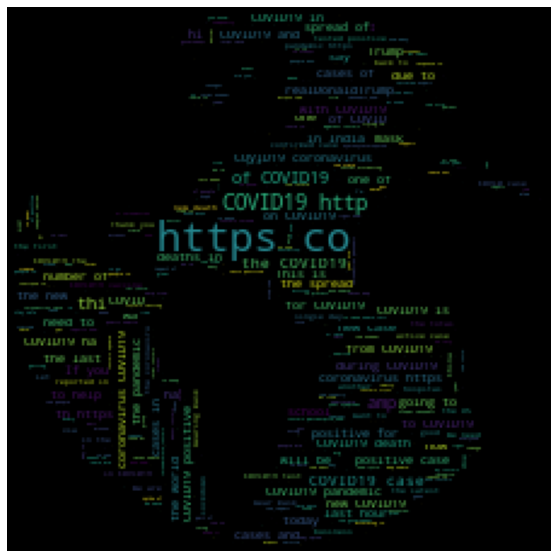

In [13]:
all_summary = " ".join(t for t in arrText)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["https"])

# Para formar o gráfico baseado em uma imagem
covid_mask = np.array(Image.open("images/420a2e2890ca4bfd6656c0e3f984e7e0.png"))

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      mask=covid_mask,
                      max_font_size=200,
                      min_font_size=1,
                      max_words=2000,
                      width=1000,
                      height=1000).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("covid_19_twitter_wordcloud.png")